<a href="https://colab.research.google.com/github/Malaaaa/final/blob/main/art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  from google.colab import drive
  import gc
  gc.collect()
  
  drive.mount('/content/drive') 


Mounted at /content/drive


In [2]:
import os
import numpy as np
import nibabel as nib 
from nibabel import  processing
import matplotlib.pyplot as plt 
import tensorflow as tf
%env SM_FRAMEWORK=tf.keras
!pip install segmentation_models
import segmentation_models as sm

env: SM_FRAMEWORK=tf.keras
     |████████████████████████████████| 50 kB 5.4 MB/s 
Segmentation Models: using `tf.keras` framework.


In [3]:
BACKBONE = 'resnet34'


In [ ]:
filepath = '/content/drive/MyDrive/final/'
dirnames = [s for s in os.listdir(filepath) if s.startswith('sub')]
filename = [f for f in os.listdir(filepath+dirnames[0]) ]

FileNotFoundError: ignored

In [ ]:
filename

['t1.nii.gz',
 't1_in_tof.nii.gz',
 'tof.nii.gz',
 'tof_arteries.nii.gz',
 'tofar_in_t1.nii.gz']

In [ ]:
filepath = '/content/drive/MyDrive/ds000224/'
dirnames = [s for s in os.listdir(filepath) if s.startswith('sub')]
filename = [f for f in os.listdir(filepath+dirnames[0]) ]

FileNotFoundError: ignored

In [4]:
filepath = '/content/drive/MyDrive/IXI/'
dirnames = [s for s in os.listdir(filepath) if s.startswith('IXI')]
filename = [f for f in os.listdir(filepath+dirnames[0]) ]

In [5]:
def min_max(x):
    # x: numpy array
    x = (x - np.min(x)) / (np.max(x) - np.min(x))
    return x

In [ ]:

# # define model
# model = sm.Unet(BACKBONE, input_shape=(None,None,3),encoder_weights='imagenet')
# model.compile(
#     'Adamax',
#     loss=sm.losses.bce_jaccard_loss,
#     metrics=[sm.metrics.iou_score],
# )

In [8]:
# # U t1 空间 normal
# # L tof 空间 normal
# # S tof 空间 无
# # A t1 空间 无
model = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/mxAdamax', custom_objects={'iou_score':sm.metrics.iou_score,'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss})

In [ ]:
a,b = 22,24

In [ ]:
dirnames[a:b]

['IXI036', 'IXI037']

In [ ]:
groundsegs = [nib.load(filepath+d+'/tofar_in_t1.nii.gz').get_data().astype(np.float32) for d in dirnames[a:b]]
t1s = [nib.load(filepath+d+'/t1.nii.gz').get_data().astype(np.float32) for d in dirnames[a:b]]
print("t1s shape = " + str(t1s[0].shape) + " groundsegs shape = " + str(groundsegs[0].shape))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  


t1s shape = (274, 384, 384) groundsegs shape = (274, 384, 384)


In [ ]:
for s in range(len(groundsegs)):
  t1s[s] = min_max(t1s[s])  
  groundsegs[s][groundsegs[s]<0.05] = 0
  groundsegs[s][groundsegs[s]>=0.05] = 1
x,y,z = groundsegs[0].shape
n= np.zeros(z)
for j in range(z):
  n[j]= np.sum(groundsegs[0][:,:,j])

Text(0.5, 1.0, 'seg')

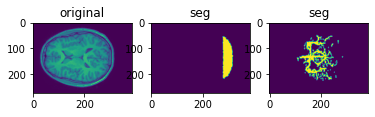

In [ ]:
plt.subplot(1,3,1); plt.imshow(t1s[0][:,:,260]); plt.title('original')
plt.subplot(1,3,2); plt.imshow(np.max(groundsegs[0][:,:,:],axis=2)); plt.title('seg')
plt.subplot(1,3,3); plt.imshow(np.max(groundsegs[1][:,:,:],axis=2)); plt.title('seg')

In [ ]:
gap


3.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  """


Text(0.5, 1.0, 'seg')

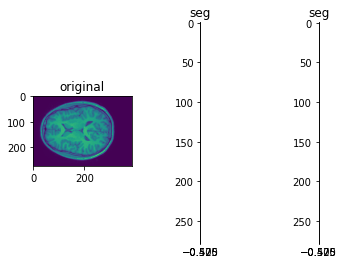

In [ ]:
min = np.min(n.nonzero())
max = np.max(n.nonzero())
plt.subplot(1,3,1); plt.imshow(t1s[0][:,:,260]); plt.title('original')
plt.subplot(1,3,2); plt.imshow(np.max(groundsegs[0][:,:,min+int(gap):max-5],axis=1)); plt.title('seg')
plt.subplot(1,3,3); plt.imshow(np.max(groundsegs[1][:,:,min+int(gap):max-5],axis=1)); plt.title('seg')

In [ ]:
for s in range(len(groundsegs)):
  t1s[s] = min_max(t1s[s])  
  groundsegs[s][groundsegs[s]<0.05] = 0
  groundsegs[s][groundsegs[s]>=0.05] = 1
for i in range(len(groundsegs)):
  x,y,z = groundsegs[i].shape
  a= np.zeros(z)
  for j in range(z):
    a[j]= np.sum(groundsegs[i][:,:,j])
  min = np.min(a.nonzero())
  max = np.max(a.nonzero())
  gap = len(n.nonzero()[0])/3
  groundsegs[i] = np.swapaxes(groundsegs[i][9:-9,:,min+int(gap):max-5],0,2)
  t1s[i] = np.swapaxes(t1s[i][9:-9,:,min+int(gap):max-5],0,2)
  # a= np.zeros(y)
  # for j in range(y):
  #   a[j]= np.sum(groundsegs[i][:,j,:])
  # min = np.min(a.nonzero())
  # max = np.max(a.nonzero())
  # groundsegs[i] = np.swapaxes(groundsegs[i][:,min:max,11:-11],0,1)
  # t1s[i] = np.swapaxes(t1s[i][:,min:max,11:-11],0,1)
  # groundsegs[i] = np.swapaxes(groundsegs[i][9:-9,:,220:281],0,2)
  # t1s[i] = np.swapaxes(t1s[i][9:-9,:,220:281],0,2)  
for i in range(len(groundsegs)):

  groundsegs[i] = np.expand_dims(groundsegs[i],axis=3)
  t1s[i] = np.expand_dims(t1s[i],axis=3)
  t1s[i] = np.tile(t1s[i],[1,1,1,3])
print("t1 shape = " + str(t1s[i].shape) + " groundseg shape = " + str(groundsegs[i].shape))

t1 shape = (93, 384, 256, 3) groundseg shape = (93, 384, 256, 1)


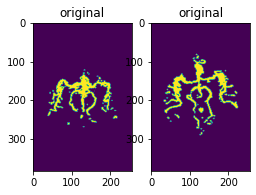

In [ ]:
plt.subplot(1,3,1); plt.imshow(np.max(groundsegs[0][:,:,:,0],axis=0)); plt.title('original')
plt.subplot(1,3,2); plt.imshow(np.max(groundsegs[1][:,:,:,0],axis=0)); plt.title('original')
plt.show()

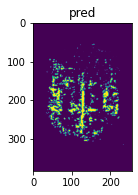

In [ ]:
pred = model.predict(t1s[0])
plt.subplot(1,3,3); plt.imshow(np.max(pred[:,:,:,0],axis=0)); plt.title('pred')
plt.show()

In [ ]:

x_train = t1s[0]
y_train = groundsegs[0]

x_val = t1s[1]
y_val = groundsegs[1]   
print("x_train shape = " + str(x_train.shape) + " x_val shape = " + str(x_val.shape))
print("y_train shape = " + str(y_train.shape) + " y_val shape = " + str(y_val.shape))
history = model.fit(
    x=x_train,
    y=y_train,
    
    batch_size=16,
    epochs=100,
    validation_data=(x_val, y_val),
  )
gc.collect()

model.save('/content/drive/MyDrive/saved_model/IxAdamax')

x_train shape = (99, 384, 256, 3) x_val shape = (97, 384, 256, 3)
y_train shape = (99, 384, 256, 1) y_val shape = (97, 384, 256, 1)
Epoch 1/100
7/7 [==============================] - 15s 870ms/step - loss: 0.8978 - iou_score: 0.1977 - val_loss: 0.9750 - val_iou_score: 0.1013
Epoch 2/100
7/7 [==============================] - 3s 399ms/step - loss: 0.6619 - iou_score: 0.3812 - val_loss: 0.9604 - val_iou_score: 0.1139
Epoch 3/100
7/7 [==============================] - 3s 400ms/step - loss: 0.5528 - iou_score: 0.4610 - val_loss: 0.8963 - val_iou_score: 0.1418
Epoch 4/100
7/7 [==============================] - 3s 399ms/step - loss: 0.4771 - iou_score: 0.5486 - val_loss: 0.8698 - val_iou_score: 0.1516
Epoch 5/100
7/7 [==============================] - 3s 399ms/step - loss: 0.4192 - iou_score: 0.6099 - val_loss: 0.8736 - val_iou_score: 0.1454
Epoch 6/100
7/7 [==============================] - 3s 400ms/step - loss: 0.3718 - iou_score: 0.6470 - val_loss: 0.8896 - val_iou_score: 0.1317
Epoch 7/1

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


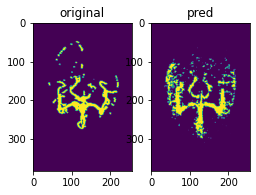

In [ ]:
pred = model.predict(t1s[1])
plt.subplot(1,3,1); plt.imshow(np.max(groundsegs[1][:,:,:,0],axis=0)); plt.title('original')
plt.subplot(1,3,2); plt.imshow(np.max(pred[:,:,:,0],axis=0)); plt.title('pred')
plt.show()

In [ ]:
len(dirnames)

40

In [ ]:
for p in range(43):
  groundsegs = [nib.load(filepath+d+'/tofar_in_t1.nii.gz').get_data().astype(np.float32) for d in dirnames[2*p:2*p+2]]
  t1s = [nib.load(filepath+d+'/t1.nii.gz').get_data().astype(np.float32) for d in dirnames[2*p:2*p+2]]
  print("t1s shape = " + str(t1s[0].shape) + " groundsegs shape = " + str(groundsegs[0].shape))
  print("swapping axes...")
  for s in range(len(groundsegs)):
    groundsegs[s][groundsegs[s]<0.05] = 0
    groundsegs[s][groundsegs[s]>=0.05] = 1
    t1s[s] = min_max(t1s[s])  

  for i in range(len(groundsegs)):
    x,y,z = groundsegs[i].shape
    a= np.zeros(z)
    for j in  range(z):
      a[j]= np.sum(groundsegs[i][:,:,j])
    min = np.min(a.nonzero())
    max = np.max(a.nonzero())
    gap = len(a.nonzero()[0])/3
    groundsegs[i] = np.swapaxes(groundsegs[i][9:-9,:,min+int(gap):max-10],0,2)
    t1s[i] = np.swapaxes(t1s[i][9:-9,:,min+int(gap):max-10],0,2)
 
    # groundsegs[i] = np.swapaxes(groundsegs[i][9:-9,:,220:281],0,2)
    # t1s[i] = np.swapaxes(t1s[i][9:-9,:,220:281],0,2) 
    # groundsegs[i] = np.swapaxes(groundsegs[i][:,:,:],0,2)
    # t1s[i] = np.swapaxes(t1s[i][:,:,:],0,2)
    # x,y,z = groundsegs[i].shape
    # groundsegs[i] = np.swapaxes(groundsegs[i][:,120:170,int(z%32*0.5):-int(z%32*0.5)],0,1)
    # t1s[i] = np.swapaxes(t1s[i][:,120:170,int(z%32*0.5):-int(z%32*0.5)],0,1)
  
  print("t1 shape = " + str(t1s[i].shape) + " groundseg shape = " + str(groundsegs[i].shape))
  print("expanding dimensions and tiling input...")
  for i in range(len(groundsegs)):

    groundsegs[i] = np.expand_dims(groundsegs[i],axis=3)
    t1s[i] = np.expand_dims(t1s[i],axis=3)
    t1s[i] = np.tile(t1s[i],[1,1,1,3])
  print("t1 shape = " + str(t1s[i].shape) + " groundseg shape = " + str(groundsegs[i].shape))
  x_train = t1s[0]
  y_train = groundsegs[0]

  x_val = t1s[1]
  y_val = groundsegs[1]   
  print("x_train shape = " + str(x_train.shape) + " x_val shape = " + str(x_val.shape))
  print("y_train shape = " + str(y_train.shape) + " y_val shape = " + str(y_val.shape))
  history = model.fit(
      x=x_train,
      y=y_train,
      batch_size=16,
      epochs=100,
      validation_data=(x_val, y_val),
    )
  gc.collect()
model.save('/content/drive/MyDrive/saved_model/mxAdamax')
  # model.save('/content/drive/MyDrive/saved_model/d'+str(p)+'Adamax')
  # with open('/content/drive/MyDrive/saved_model/d'+str(p)+'trainHistoryDict.txt', 'wb') as file_pi:
  #   pickle.dump(history.history, file_pi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  This is separate from the ipykernel package so we can avoid doing imports until


t1s shape = (274, 384, 384) groundsegs shape = (274, 384, 384)
swapping axes...
t1 shape = (73, 384, 256) groundseg shape = (73, 384, 256)
expanding dimensions and tiling input...
t1 shape = (73, 384, 256, 3) groundseg shape = (73, 384, 256, 1)
x_train shape = (63, 384, 256, 3) x_val shape = (73, 384, 256, 3)
y_train shape = (63, 384, 256, 1) y_val shape = (73, 384, 256, 1)
Epoch 1/100


In [ ]:
model.save('/content/drive/MyDrive/saved_model/Adamax')


In [ ]:
dirnames[2*p:2*p+2]

['IXI036', 'IXI037']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


ts shape = (480, 640, 150) gs shape = (480, 640, 150)
t1 shape = (150, 640, 480, 3) groundseg shape = (150, 640, 480, 1)


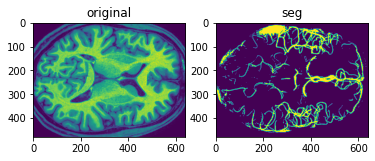

In [ ]:
filepath = '/content/drive/MyDrive/final/'
dirnames = [s for s in os.listdir(filepath) if s.startswith('sub')]
filename = [f for f in os.listdir(filepath+dirnames[5]) ]
gs = [nib.load(filepath+dirnames[1]+'/tof_arteries.nii.gz').get_data().astype(np.float32)]
ts = [nib.load(filepath+dirnames[1]+'/t1_in_tof.nii.gz').get_data().astype(np.float32) ]
print("ts shape = " + str(ts[0].shape) + " gs shape = " + str(gs[0].shape))
plt.subplot(1,2,1); plt.imshow(ts[0][:,:,80]); plt.title('original')
plt.subplot(1,2,2); plt.imshow(np.max(gs[0][:,:,:],axis=2)); plt.title('seg')
for s in range(len(gs)):
  # gs[s][gs[s]<0.01] = 0
  # gs[s][gs[s]>=0.01] = 1
  ts[s] = min_max(ts[s])  

for i in range(len(gs)):
  gs[i] = np.swapaxes(gs[i][:,:,:],0,2)
  ts[i] = np.swapaxes(ts[i][:,:,:],0,2)
for i in range(len(gs)):

  gs[i] = np.expand_dims(gs[i],axis=3)
  ts[i] = np.expand_dims(ts[i],axis=3)
  ts[i] = np.tile(ts[i],[1,1,1,3])
print("t1 shape = " + str(ts[i].shape) + " groundseg shape = " + str(gs[i].shape))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


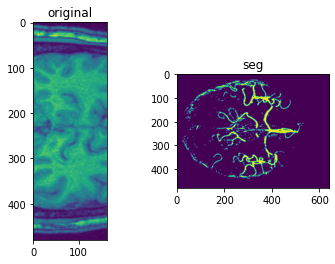

In [ ]:
filepath = '/content/drive/MyDrive/ds000224/'
dirnames = [s for s in os.listdir(filepath) if s.startswith('sub')]
filename = [f for f in os.listdir(filepath+dirnames[0]) ]
gs = [nib.load(filepath+dirnames[1]+'/tofar_in_t1.nii.gz').get_data().astype(np.float32)]
ts = [nib.load(filepath+dirnames[1]+'/t1.nii.gz').get_data().astype(np.float32) ]

plt.subplot(1,2,1); plt.imshow(ts[0][:,150,:]); plt.title('original')
plt.subplot(1,2,2); plt.imshow(np.max(gs[0][:,:,:],axis=2)); plt.title('seg')
# for s in range(len(gs)):
#   # gs[s][gs[s]<0.01] = 0
#   # gs[s][gs[s]>=0.01] = 1
#   ts[s] = min_max(ts[s]) 
for i in range(len(gs)):
  gs[i] = np.swapaxes(gs[i][:,:,:],0,2)
  ts[i] = np.swapaxes(ts[i][:,:,:],0,2)
for i in range(len(gs)):

  gs[i] = np.expand_dims(gs[i],axis=3)
  ts[i] = np.expand_dims(ts[i],axis=3)
  ts[i] = np.tile(ts[i],[1,1,1,3])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  """


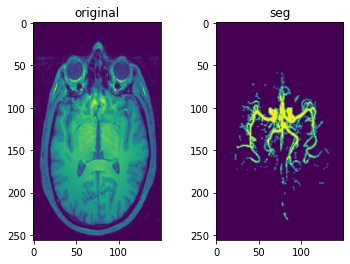

In [ ]:
filepath = '/content/drive/MyDrive/IXI/'
dirnames = [s for s in os.listdir(filepath) if s.startswith('IXI')]
filename = [f for f in os.listdir(filepath+dirnames[0]) ]
gs = [nib.load(filepath+dirnames[1]+'/tofar_in_t1.nii.gz').get_data().astype(np.float32)]
ts = [nib.load(filepath+dirnames[1]+'/t1.nii.gz').get_data().astype(np.float32) ]

plt.subplot(1,2,1); plt.imshow(ts[0][:,150,:]); plt.title('original')
plt.subplot(1,2,2); plt.imshow(np.max(gs[0][:,:,:],axis=1)); plt.title('seg')
for s in range(len(gs)):
  # gs[s][gs[s]<0.01] = 0
  # gs[s][gs[s]>=0.01] = 1
  ts[s] = min_max(ts[s]) 
for i in range(len(gs)):
  gs[i] = np.swapaxes(gs[i][:,120:181,11:-11],0,1)
  ts[i] = np.swapaxes(ts[i][:,120:181,11:-11],0,1)
for i in range(len(gs)):

  gs[i] = np.expand_dims(gs[i],axis=3)
  ts[i] = np.expand_dims(ts[i],axis=3)
  ts[i] = np.tile(ts[i],[1,1,1,3])

In [ ]:
# U t1 空间 normal
# L tof 空间 normal
# S tof 空间 无
# A t1 空间 无
Umodel = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/UAdamax', custom_objects={'iou_score':sm.metrics.iou_score,'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss})
Lmodel = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/LAdamax', custom_objects={'iou_score':sm.metrics.iou_score,'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss})
Smodel = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/SAdamax', custom_objects={'iou_score':sm.metrics.iou_score,'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss})
Amodel = tf.keras.models.load_model('/content/drive/MyDrive/saved_model/AAdamax', custom_objects={'iou_score':sm.metrics.iou_score,'binary_crossentropy_plus_jaccard_loss':sm.losses.bce_jaccard_loss})


In [ ]:
predU = Umodel.predict(ts[0])
predL = Lmodel.predict(ts[0])
predS = Smodel.predict(ts[0])
predA = Amodel.predict(ts[0])

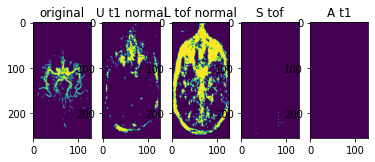

In [ ]:
plt.subplot(1,5,1); plt.imshow(np.max(gs[0][:,:,:,0],axis=0)); plt.title('original')
plt.subplot(1,5,2); plt.imshow(np.max(predU[:,:,:,0],axis=0)); plt.title('U t1 normal')
plt.subplot(1,5,3); plt.imshow(np.max(predL[:,:,:,0],axis=0)); plt.title('L tof normal')
plt.subplot(1,5,4); plt.imshow(np.max(predS[:,:,:,0],axis=0)); plt.title('S tof')
plt.subplot(1,5,5); plt.imshow(np.max(predA[:,:,:,0],axis=0)); plt.title('A t1')
plt.show()